Criando o DataFrame

In [2]:
import pandas as pd
from datetime import datetime
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

# Criação do dataset

n = range(250) # numero de linhas

# Dicionário com as categorias e os produtos correspondentes
category_produto = {        
    'Periférico': ['Monitor', 'Mouse', 'Teclado'],
    'Hardware': ['Processador', 'Placa de Video', 'SSD']
}

location = ['São Paulo', 'Bauru', 'São José dos Campos', 'Torrinha']
data_range = pd.date_range(start = datetime(2023,1,1), end = datetime(2023,9,7), freq='D')

# Função para selecionar categoria e produto corretos
categorias_array = []
product_array = []

for _ in n:
    category = rd.choice(list(category_produto.keys()))  # Seleciona uma categoria
    produto = rd.choice(category_produto[category])  # Seleciona um produto vinculado à categoria
    categorias_array.append(category)
    product_array.append(produto)

# Criação do dataset
data_market = {
    'Id_Produto': list(n),
    'Produto': product_array,
    'Categoria': categorias_array,
    'Preço_Unitário': [round(rd.uniform(250,2000), 2) for _ in n],
    'Quantidade Vendida': [int(rd.uniform(1,80)) for _ in n],
    'Id_loja': list(n),
    'Localidade': [rd.choice(location) for _ in n],
    'Data_Venda': data_range
}

# Criação do dataframe
df_market = pd.DataFrame(data_market)

# Criando preço total
df_market['Preço_Total'] = df_market['Preço_Unitário'] * df_market['Quantidade Vendida']

print(df_market.to_string(index=False))

 Id_Produto        Produto  Categoria  Preço_Unitário  Quantidade Vendida  Id_loja          Localidade Data_Venda  Preço_Total
          0        Monitor Periférico          989.29                   2        0           São Paulo 2023-01-01      1978.58
          1        Teclado Periférico         1025.85                  44        1           São Paulo 2023-01-02     45137.40
          2          Mouse Periférico         1413.22                  74        2            Torrinha 2023-01-03    104578.28
          3 Placa de Video   Hardware          440.17                  12        3 São José dos Campos 2023-01-04      5282.04
          4        Teclado Periférico         1797.21                  32        4 São José dos Campos 2023-01-05     57510.72
          5          Mouse Periférico         1267.69                  37        5               Bauru 2023-01-06     46904.53
          6    Processador   Hardware         1219.80                  79        6            Torrinha 2023-01-

ANÁLISE EXPLORATÓRIA

    Qual é o total de vendas por produto?

In [3]:
df_market.groupby('Produto')['Quantidade Vendida'].sum()

Produto
Monitor           1359
Mouse             1662
Placa de Video    1747
Processador       1878
SSD               1946
Teclado           1235
Name: Quantidade Vendida, dtype: int64

    Qual é a loja que vendeu mais produtos?

In [4]:
df_aux = df_market.groupby('Localidade')['Quantidade Vendida'].sum()
print((df_aux.sort_values(ascending=False)))

Localidade
Torrinha               2705
São José dos Campos    2601
São Paulo              2469
Bauru                  2052
Name: Quantidade Vendida, dtype: int64


    Qual categoria de produto teve mais vendas em termos de quantidade?

In [5]:
df_aux = df_market.groupby('Categoria')['Quantidade Vendida'].sum()
print(df_aux.sort_values(ascending=False))

Categoria
Hardware      5571
Periférico    4256
Name: Quantidade Vendida, dtype: int64


ANÁLISE TEMPORAL

    Identifique qual mês do ano teve mais vendas (quantidade) e qual mês gerou mais receita (valor total de vendas)

In [6]:
# Criar a coluna de meses a partir da coluna Data_Venda
df_market['Mes_Venda'] = pd.to_datetime(df_market['Data_Venda']).dt.strftime('%B')

# Mes co0m mais vendas
df_vendas = df_market.groupby('Mes_Venda')['Quantidade Vendida']
print(df_vendas.max().sort_values(ascending=False))

print()

# Mes com mais receita
df_receita = df_market.groupby('Mes_Venda')['Preço_Total']
print(df_receita.max().sort_values(ascending=False))

Mes_Venda
January      79
May          77
July         77
August       76
February     76
April        75
September    75
June         72
March        68
Name: Quantidade Vendida, dtype: int64

Mes_Venda
July         145502.00
August       140954.92
May          135597.00
April        128215.36
January      123390.89
June         122572.80
March        106777.61
February     104647.30
September     42669.75
Name: Preço_Total, dtype: float64


AGRUPAMENTO DE DADOS

    Agrupe os dados por categoria e calcule a média de vendas por produto dentro de cada categoria

In [7]:
# Agrupando os dados
df_agrupado = df_market.groupby(['Categoria', 'Produto'])['Quantidade Vendida'].mean().reset_index()

print(df_agrupado.to_string(index=False))

 Categoria        Produto  Quantidade Vendida
  Hardware Placa de Video           42.609756
  Hardware    Processador           43.674419
  Hardware            SSD           37.423077
Periférico        Monitor           38.828571
Periférico          Mouse           39.571429
Periférico        Teclado           33.378378


    Quais produtos tiveram as melhores vendas em cada localidade?

In [8]:
# Agrupando os dados
df_vendas = df_market.groupby(['Localidade', 'Produto'])['Preço_Total'].sum().reset_index()

# Encontrar o produto com a maior venda em cada localidade
idx_max_vendas = df_vendas.groupby('Localidade')['Preço_Total'].idxmax()

# Selecionar os produtos com a melhor venda em cada localidade
melhores_vendas_por_localidade = df_vendas.loc[idx_max_vendas]

print(melhores_vendas_por_localidade.to_string(index=False))

         Localidade        Produto  Preço_Total
              Bauru Placa de Video    655553.61
São José dos Campos            SSD    671440.96
          São Paulo    Processador    706648.72
           Torrinha            SSD   1015439.17


CRIAÇÃO DE GRÁFICOS

    Crie gráficos de barras para visualizar as vendas por produto e por loja.

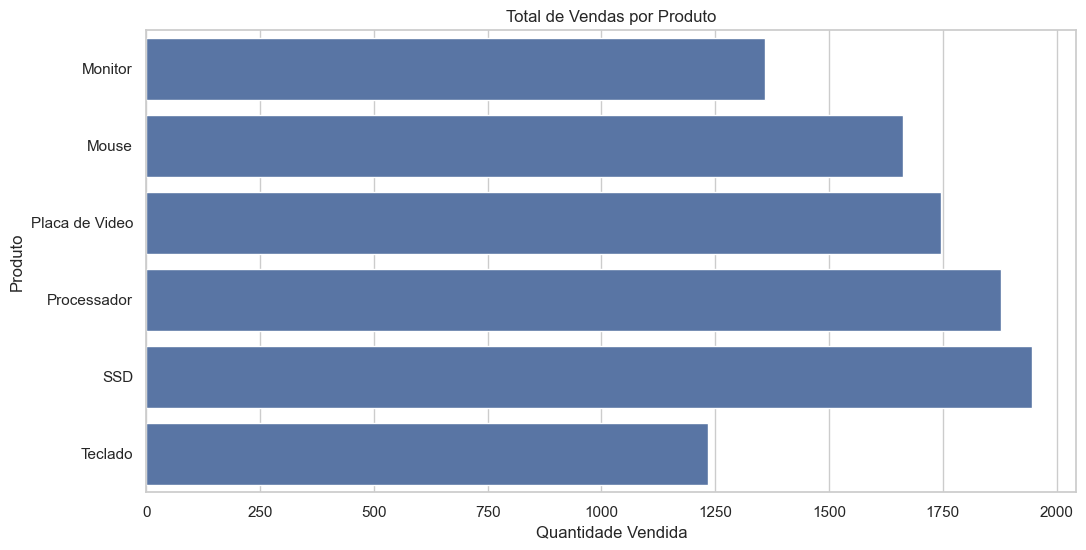

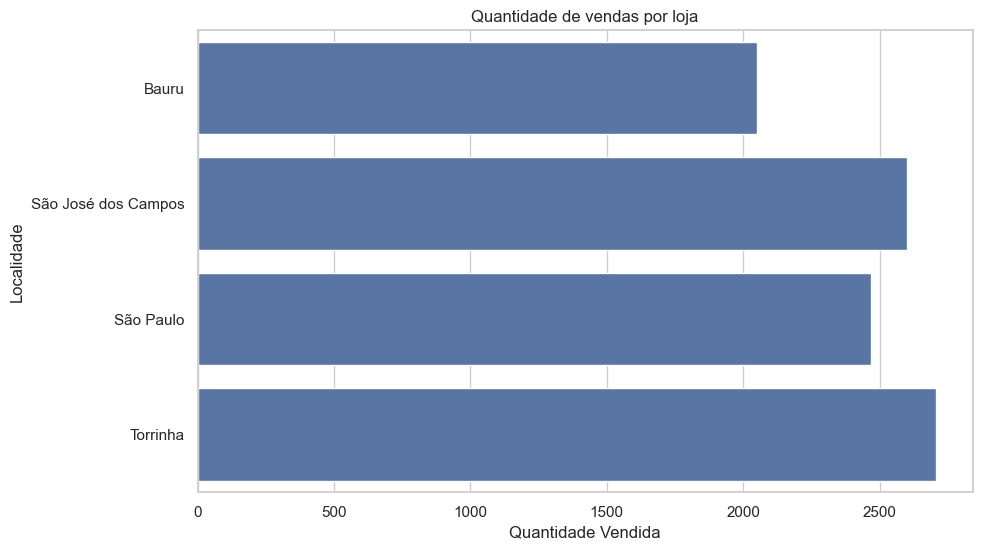

In [29]:
# Gráfico de barras para vendas por produto
plt.figure(figsize=(12, 6))
sales_by_product = df_market.groupby('Produto')['Quantidade Vendida'].sum().reset_index()
sns.barplot(x='Quantidade Vendida', y='Produto', data=sales_by_product)
plt.title('Total de Vendas por Produto')
plt.xlabel('Quantidade Vendida')
plt.show()

# Gráfico de barras para vendas por produto
plt.figure(figsize=(10,6))
sales_by_store = df_market.groupby('Localidade')['Quantidade Vendida'].sum().reset_index()
sns.barplot(x='Quantidade Vendida', y='Localidade', data=sales_by_store)
plt.title('Quantidade de vendas por loja')
plt.show()

    Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.

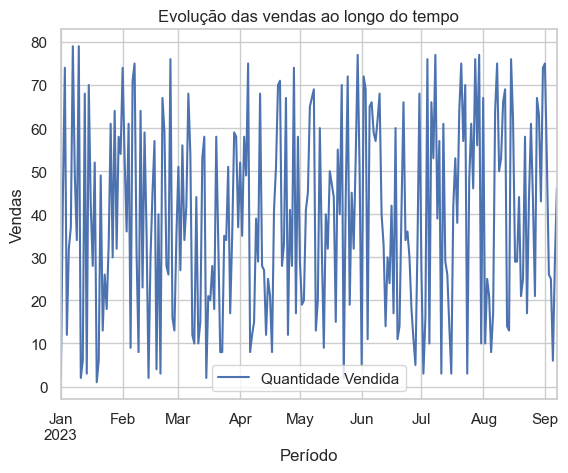

In [27]:
df_vendas = df_market.groupby('Data_Venda')['Quantidade Vendida'].sum().reset_index()
df_vendas.plot(x='Data_Venda', y='Quantidade Vendida', kind='line')
plt.title('Evolução das vendas ao longo do tempo')
plt.ylabel('Vendas')
plt.xlabel('Período')
plt.show()